# Final Project(Data Visualization)

# Topic: Data Mining from the News and building a Network Analysis


#### Team Members:

Name: Amar Kumar Reddy ,akm352@drexel.edu

Name: Astha jain , aj887@drexel.edu

Name: Nupur Roy Chowdhury, nr572@drexel.edu

# 1. Load The Required Packages

In [3]:
#pip install squarify

In [4]:
import pandas as pd
import numpy as np
import math
import networkx as nx
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

tqdm.pandas()

C:\Users\nupur_nsxs2zt\anaconda3\lib\site-packages\tqdm\std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


# 2. Load The Data

Here we are loading the Created Dataset "800Articles.csv" and "df_links.csv" from the previous file of Data Pre-processing for our further Graph Analysis of the data

In [87]:
df_articles =  pd.read_csv('./data/800Articles.csv')
df_links = pd.read_csv('./data/df_links.csv')

In [89]:
print(" Length of dataframe:",len(df_links.index))

 Length of dataframe: 5085


### 2.1 Dropping the unnecessary column called Unnamed

In [14]:
df_articles=df_articles.drop(['Unnamed: 0'],axis=1)

Below is the top 5 sample data from the DataFrame

In [15]:
df_articles.head()

url  \
0  https://www.espn.com/blog/atlanta-falcons/post...   
1  https://www.houstoniamag.com/coronavirus/2020/...   
2  https://www.theedgemarkets.com/article/mahb-do...   
3  https://www.wifr.com/content/news/Illinois-gar...   
4  https://newsinfo.inquirer.net/1263337/lacson-o...   

                                               title  \
0  Trade or not, Falcons can't afford first-round...   
1  A Local E.R. Doctor and Former Astronaut Talks...   
2  MAHB donates comfort kits to front liners at H...   
3           Illinois garden centers to reopen in May   
4  Lacson on P10M ‘reward’ for COVID-19 vaccine: ...   

                                    meta_description                  domain  \
0  Moving into the top 5 would be difficult for t...            www.espn.com   
1  Dr. William Fisher, a former astronaut and fat...    www.houstoniamag.com   
2  KUALA LUMPUR (April 23): Malaysia Airports Bhd...  www.theedgemarkets.com   
3  Garden centers across the state get the green ...            www.wifr.com   
4  Why not invest more in the country’s research ...   newsinfo.inquirer.net   

                                             content  
0  Kevin Negandhi dives into the careers of the t...  
1  A few weeks ago, we spoke to an Italian doctor...  
2  KUALA LUMPUR (April 23): Malaysia Airports Bhd...  
3  Garden centers in the region celebrate as Gove...  
4  MANILA, Philippines — Why not invest more in t...

In [9]:
df_links.head()

from         to  weight
0  49ers        Buc       2
1  49ers      Colts       2
2  49ers       Cook       2
3  49ers  Garoppolo       2
4  49ers         Jr       2

### 2.2 Below is the Display of the Top links on the News

In [27]:
df_links[['from', 'to', 'weight']].sort_values('weight', ascending=False).head(10)

from      to  weight
2512                                       Fauci   Trump      16
1782                                    Congress   Trump      15
4976                                       Trump   Trump      14
1774                                    Congress  Senate      10
4734                                      Senate   Trump      10
3204                                       House  Senate       8
1291  Centers for Disease Control and Prevention   Trump       8
3529                                        Kemp   Trump       7
5005                                       Trump     WHO       7
1163                                         CDC   Trump       7

From the above DataFrame we can see that the highest weight to the link is 16.
Which means that the most connections is found between Fauci and Trump, followed by Congress and Trump.

Below is the article which is related to the highest link weight(LINK WEIGHT - HIGHEST(16)):

Dr. Anthony Fauci, one of the most prominent members of the White House coronavirus task force and Trump have appeared in many articles together.

Then there are articles with high weights where Congress, senate and trump are mentioned which also makes sense as those people are US political and commercial entities and are mentioned together in news articles.

# 3. Creating the Subset Data

We have created the below Subset data by the following description:

         -get link counts

         -only keep links which have appeared together at least 2 times ( people who have appeared together in more than 2 articles)

In [23]:
links = df_links[['from', 'to', 'weight']].sort_values('weight', ascending=False)

### 3.1 Histogram 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B426AAB808>]],
      dtype=object)

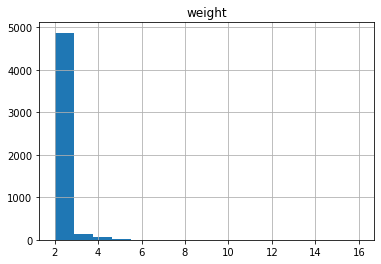

In [24]:
links.hist(bins=max(df_links['weight']))

From the graph above we can observe that links with weight 2-3 are highest in number, which states that there are many articles which have mentioned people in more than 2 articles.

# 4. Plot Edges

We are going to plot the most common edges in the network below:

# Graph Theory


Once we have our list of entities for each article, we’ll organise them into a graph structure. 
Graphs are, by definition, a set of vertices and edges:

                                 G = (V , E)

Where G is our graph, made up of a set of vertices V (or nodes) and a set of edges E (or links).

Types of Graphs:

##### Graphs can be directed or undirected :

A directed graph’s nodes are linked with a direction, whereas the direction of links are irrelevant for an undirected graph. 

##### Graphs can be connected or unconnected :

A graph is connected if you can trace a path from any node to any other node. Our graph from above is connected, because all nodes are somehow connected to all others.


##### Nodes have centrality measures :

These are metrics to describe how important a node is within a network. One of these measures (which we’ll use in the upcoming analysis) is eigenvector centrality, which assigns a score to each node based on how many other important nodes to which it’s connected. A famous use case of eigenvector centrality is Google’s PageRank algorithm.


##### Graphs can have cliques :

cliques are a subset of graphs (or sub-graphs) in which all pairs of nodes are connected. These are the mathematical representations of friendship groups from your school days.

# Kamada and Kawai Layout:

### Objective:


The algorithm of Kamada and Kawai [KK89] uses spring forces proportional to the graph theoretic distances. In general, force-directed methods define an objective function which maps each graph. layout into a number in R+ representing the energy of the layout.This function is defined in such a way that low energies correspond to layouts in which adjacent nodes are near some
pre-specified distance from each other, and in which non-adjacent nodes are well-spaced. A layout for a graph is then calculated by finding a (often local) minimum of this objective function

### Graph Theoretic Distances Approach:


The 1989 algorithm of Kamada and Kawai [KK89] introduced a different way of thinking about “good” graph layouts. Whereas the algorithms of Eades and Fruchterman-Reingold aim to keep adjacent vertices close to each other while ensuring that vertices are not too close to each other, Kamada and Kawai take graph theoretic approach: 

We regard the desirable geometric (Euclidean) distance between two vertices in the drawing as the graph theoretic distance between them in the corresponding graph.

In this model, the “perfect” drawing of a graph would be one in which the pair-wise geometric distances between the drawn vertices match the graph theoretic pairwise distances, as computed by an All-Pairs-Shortest-Path computation. As this goal cannot always be achieved for arbitrary graphs in 2D or 3D Euclidean spaces, the approach relies on setting up a spring system in such a way that minimizing the energy of the system corresponds to minimizing the difference between the geometric and graph distances. In this model there are no separate attractive and repulsive forces between pairs of vertices, but instead if a pair of vertices is (geometrically) closer/farther than their corresponding graph distance the vertices repel/attract each other. di,j denote the shortest path distance between vertex i and vertex j in the graph. Then li,j = L × di,j is the ideal length of a spring between vertices i and j, where L is the desirable length of a single edge in the display. Kamada and Kawai suggest that                                  
                                             
                                             L = L0/ maxi<j di,j , 


where L0 is the length of a side of the display area and maxi<j di,j is the diameter of the graph, i.e., the distance between the farthest pair of vertices. The strength of the spring between vertices i and j is defined as

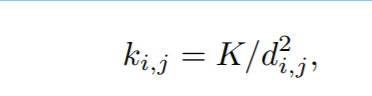



where K is a constant. Treating the drawing problem as localizing |V | = n particles p1, p2, . . . , pn in 2D Euclidean space, leads to the following overall energy function:

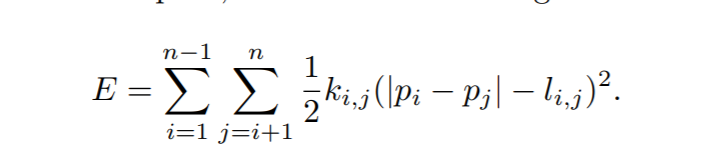


The coordinates of a particle pi in the 2D Euclidean plane are given by xi and yi which allows us to rewrite the energy function as follows:


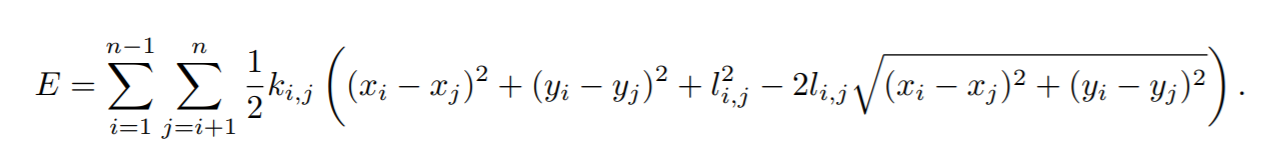


The goal of the algorithm is to find values for the variables that minimize the energy function E(x1, x2, . . . , xn, y1, y2, . . . , yn). In particular, at a local minimum all the partial derivatives are equal to zero, and which corresponds to solving 2n simultaneous non-linear equations. Therefore, Kamada and Kawai compute a stable position one particle pm at a time. Viewing E as a function of only xm and ym a minimum of E can be computed using the Newton-Raphson method. At each step of the algorithm the particle pm with the largest value of ∆m is chosen, where


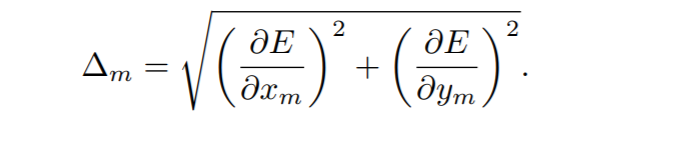


Pseudo-code for the algorithm by Kamada and Kawai is shown

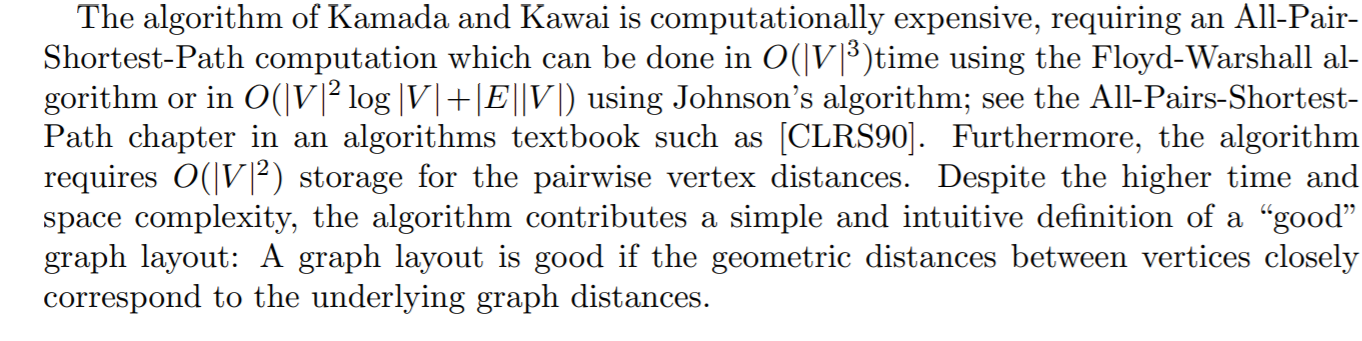

### 4.1 Below is the graph created considering all the given weights in the DataFrame

In [21]:
G_all = nx.Graph()

for link in tqdm(df_links.index):
  G_all.add_edge(df_links.iloc[link]['from'],
             df_links.iloc[link]['to'],
             weight=df_links.iloc[link]['weight'])

100%|██████████| 5085/5085 [00:01<00:00, 3110.84it/s]


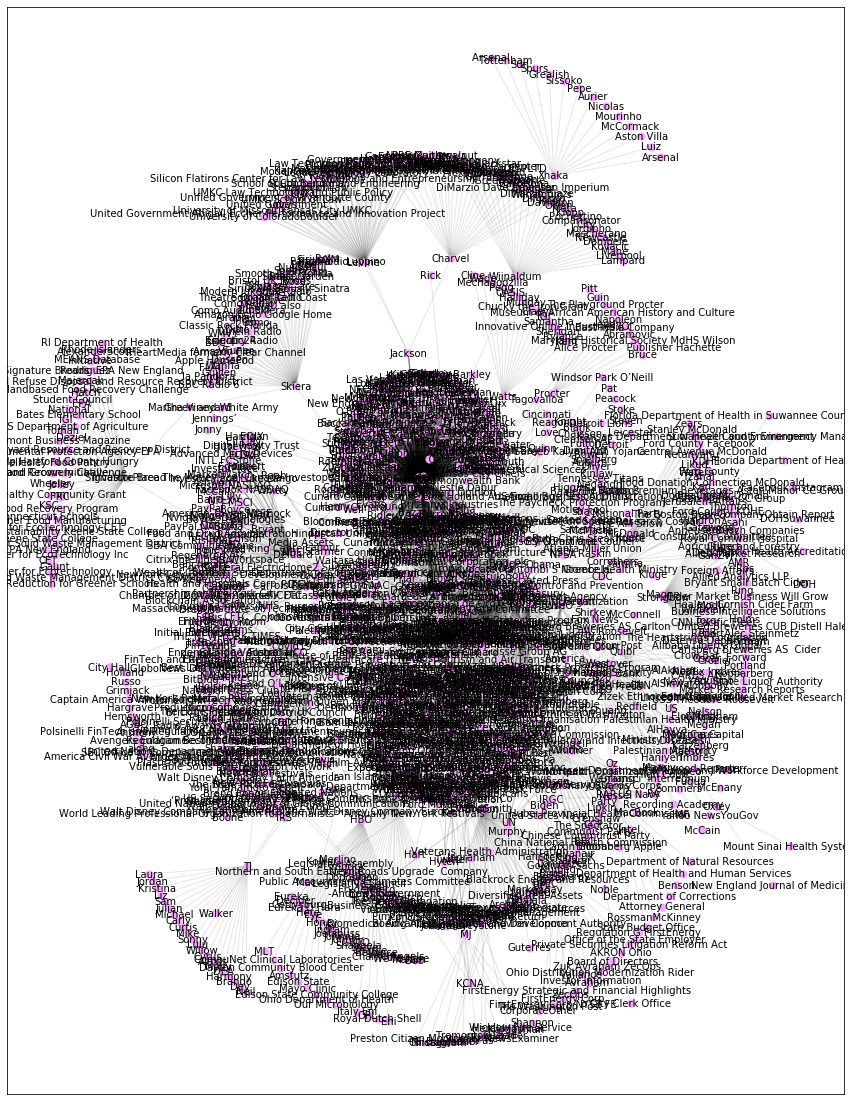

In [22]:
pos = nx.kamada_kawai_layout(G_all)
nodes = G_all.nodes()
fig, axs = plt.subplots(1, 1, figsize=(15,20))

el = nx.draw_networkx_edges(G_all, pos, alpha=0.1, ax=axs)
nl = nx.draw_networkx_nodes(G_all, pos, nodelist=nodes, node_color='#FAA6FF', 
                            with_labels=True, node_size=50, ax=axs)
ll = nx.draw_networkx_labels(G_all, pos, font_size=10, font_family='sans-serif')

Here each dot represents an entity which can be a person or an organization and the link between two dots mean they have appeared in separate articles together.

Below we will be refining this graph more depending on the weight each edge(link) carries between two dots to get more understanding from the graph

### 4.2 Below is the graph created considering the weights which are greater than (2) in the DataFrame as we had seen in the histogram

In [23]:
# df_plot = df_links.sort_values('weight', ascending=False).head(150)
df_plot = df_links[df_links['weight']>2]
df_plot.reset_index(inplace=True, drop=True)

G_plot = nx.Graph()

for link in tqdm(df_plot.index):
  G_plot.add_edge(df_plot.iloc[link]['from'],
             df_plot.iloc[link]['to'],
             weight=df_plot.iloc[link]['weight'])

100%|██████████| 215/215 [00:00<00:00, 1413.05it/s]


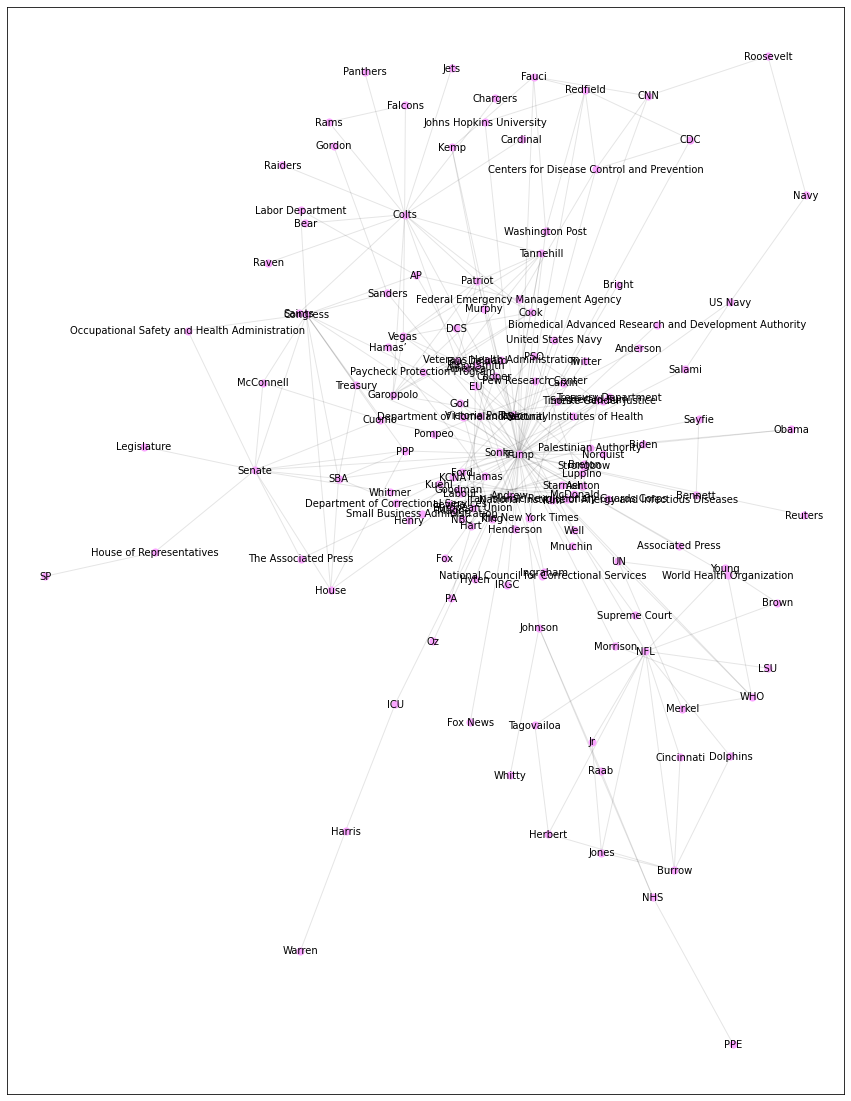

In [24]:
pos = nx.kamada_kawai_layout(G_plot)
nodes = G_plot.nodes()
fig, axs = plt.subplots(1, 1, figsize=(15,20))

el = nx.draw_networkx_edges(G_plot, pos, alpha=0.1, ax=axs)
nl = nx.draw_networkx_nodes(G_plot, pos, nodelist=nodes, node_color='#FAA6FF', 
                            with_labels=True, node_size=50, ax=axs)
ll = nx.draw_networkx_labels(G_plot, pos, font_size=10, font_family='sans-serif')

When we put a condition on the weight where weight is greater than 2 we can see some groups of interest which are getting formed within the network. It has quite diverse nodes which includes various news topics, so we are going to further investigate the network with different weight values.

### 4.2 Below is the graph created considering the weights which are greater than (3) in the DataFrame as we had seen in the histogram

In [17]:
# df_plot = df_links.sort_values('weight', ascending=False).head(150)
df_plot = df_links[df_links['weight']>3]
df_plot.reset_index(inplace=True, drop=True)

G_plot = nx.Graph()

for link in tqdm(df_plot.index):
  G_plot.add_edge(df_plot.iloc[link]['from'],
             df_plot.iloc[link]['to'],
             weight=df_plot.iloc[link]['weight'])

100%|██████████| 86/86 [00:00<00:00, 2599.71it/s]


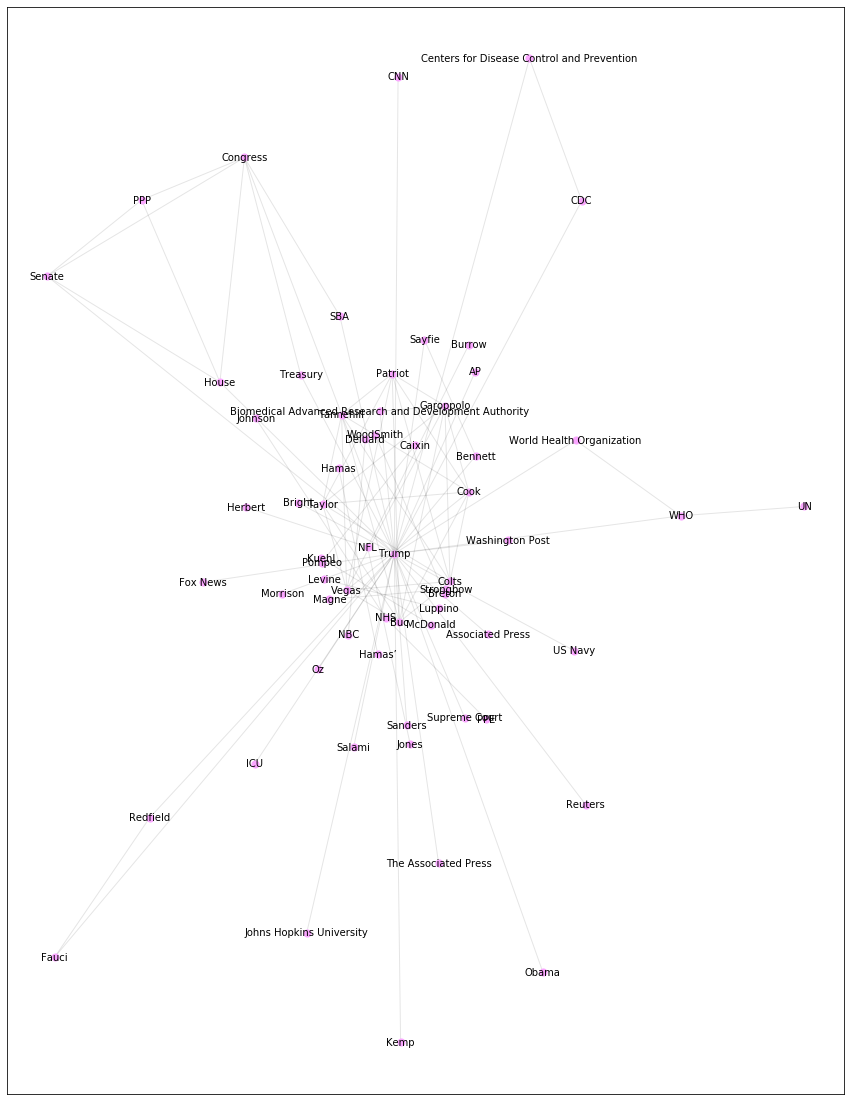

In [18]:
pos = nx.kamada_kawai_layout(G_plot)
nodes = G_plot.nodes()
fig, axs = plt.subplots(1, 1, figsize=(15,20))

el = nx.draw_networkx_edges(G_plot, pos, alpha=0.1, ax=axs)
nl = nx.draw_networkx_nodes(G_plot, pos, nodelist=nodes, node_color='#FAA6FF', 
                            with_labels=True, node_size=50, ax=axs)
ll = nx.draw_networkx_labels(G_plot, pos, font_size=10, font_family='sans-serif')

When we put a condition on the weight where weight is greater than 3 we can see some clusters getting formed of interest within the network. The nodes now get created in a graph where the related nodes are connected to each other and also it helps us in undertstanding as to which entities in the news are more connected and it is clear.

### 4.2 Below is the graph created considering the weights which are greater than (7) in the DataFrame as we had seen in the histogram

In [28]:
# df_plot = df_links.sort_values('weight', ascending=False).head(150)
df_plot = df_links[df_links['weight']>7]
df_plot.reset_index(inplace=True, drop=True)

G_plot = nx.Graph()

for link in tqdm(df_plot.index):
  G_plot.add_edge(df_plot.iloc[link]['from'],
             df_plot.iloc[link]['to'],
             weight=df_plot.iloc[link]['weight'])

100%|██████████| 7/7 [00:00<00:00, 1789.71it/s]


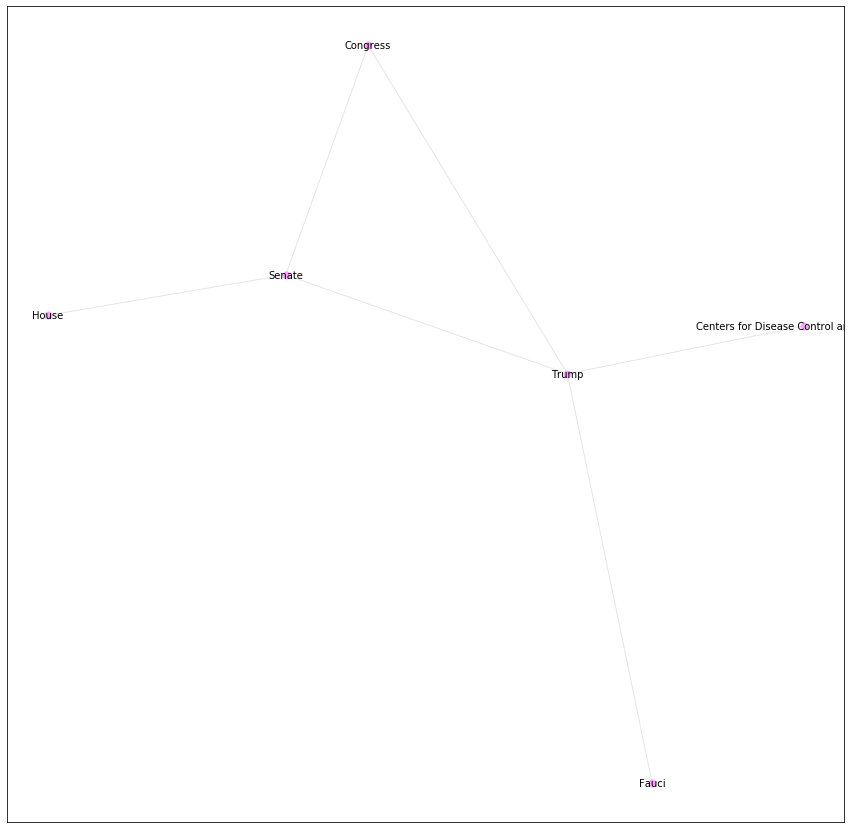

In [31]:
pos = nx.kamada_kawai_layout(G_plot)
nodes = G_plot.nodes()
fig, axs = plt.subplots(1, 1, figsize=(15,15))

el = nx.draw_networkx_edges(G_plot, pos, alpha=0.1, ax=axs)
nl = nx.draw_networkx_nodes(G_plot, pos, nodelist=nodes, node_color='#FAA6FF', 
                            with_labels=True, node_size=50, ax=axs)
ll = nx.draw_networkx_labels(G_plot, pos, font_size=10, font_family='sans-serif')

When we put a condition on the weight where weight is greater than 7, it gives us the entities which are greater than 7 and who always occure together in the news. And as the entities get more specific a clear graph gets formed which can be understood and says that entities like Trump, Senate, Fauci,House etc appear in the news articles at the same time and related to each other through some news article

And also if we see we can find the edges between the nodes(entities) which means that these entities are connected with each other in the news network and they form one cluster where if one entity appears in the news it is also possible that all the connected entities also appear in the news during that time.

# 5. Find Subgraphs

Creating subgraphs from the links with weight greater than 2.

In [32]:
G = nx.Graph()

for link in tqdm(df_links.index):
  G.add_edge(df_links.iloc[link]['from'],
             df_links.iloc[link]['to'],
             weight=df_links.iloc[link]['weight'])

100%|██████████| 5085/5085 [00:01<00:00, 3033.61it/s]


## 5.1 The Insight

### 5.1.1 How Many People and Connections are in our Network?
 
  we’ll use the nodes() and edges() methods to find the number of entities and connections in our social network:

In [33]:
n_nodes = len(G.nodes())
n_edges = len(G.edges())
print(f'There were {n_nodes} entities and {n_edges} connections found in the network.')

There were 1631 entities and 5085 connections found in the network.


### 5.1.2 Does Everyone Know Each Other in the Network?

we'll use is_connected() method to find out if the graph is connected or not.

In [34]:
nx.is_connected(G)

False

Our graph is not connected that means not all nodes are connected to each other in the graph.

So, next question to address would be how big is each subgraph?

### 5.1.3  How big is each subgraph?

### Find subgraphs and sizes

In [35]:
subgraphs = [G.subgraph(c) for c in nx.connected_components(G)]
subgraph_nodes = [sg.number_of_nodes() for sg in subgraphs]

df_subgraphs = pd.DataFrame(data={
    'id': range(len(subgraph_nodes)),
    'nodes': subgraph_nodes
})

df_subgraphs['percentage'] = df_subgraphs['nodes'].map(lambda x: 100*x/sum(df_subgraphs['nodes']))

df_subgraphs = df_subgraphs.sort_values('nodes', ascending=False).reset_index(drop=True)
df_subgraphs


id  nodes  percentage
0    0   1428   87.553648
1    5     18    1.103617
2    1     18    1.103617
3   12     15    0.919681
4    6     13    0.797057
5    3     11    0.674433
6   24     11    0.674433
7    9     11    0.674433
8   11     11    0.674433
9   20     11    0.674433
10   8     10    0.613121
11  10      8    0.490497
12  28      7    0.429185
13   2      6    0.367872
14  19      5    0.306560
15  21      5    0.306560
16  15      5    0.306560
17   4      5    0.306560
18  18      4    0.245248
19  22      4    0.245248
20  17      3    0.183936
21  14      3    0.183936
22   7      3    0.183936
23  25      3    0.183936
24  26      3    0.183936
25  16      2    0.122624
26  13      2    0.122624
27  23      2    0.122624
28  27      2    0.122624
29  29      2    0.122624

Over 87% of our nodes belong to one big connected cluster. 

### 5.1.4 But How Do All These People Know Each Other?

1. We will use a shortest-path algorithm to find this out. 

   1.1  We’ll recreate our graph using only the nodes which belong in the 87% who all know each other (we want to make sure our graph is connected) 

   1.2  We’ll  add a new attribute, inverse_weight to our edges.

This will be the reciprocal of our original weight (i.e. the number of articles mentioning the two entities), which will help our shortest path algorithm prioritise high weights (more common connections) over low ones.

### 5.1.5 Generate graph from main subgraph

Recreating our graph using only the nodes which belong in the 87% who all know each other to make sure our graph is connected
and calculating inverse weight to get the shortest distance between any two nodes.

In [58]:
sg = subgraphs[np.argmax(np.array(subgraph_nodes))]

df_links_sg = nx.to_pandas_edgelist(sg)

df_links_sg['inverse_weight'] = df_links_sg['weight'].map(lambda x: 1/x)

G = nx.Graph()

for link in tqdm(df_links_sg.index):
  G.add_edge(df_links_sg.iloc[link]['source'],
             df_links_sg.iloc[link]['target'],
             weight = df_links_sg.iloc[link]['weight'],
             inverse_weight = df_links_sg.iloc[link]['inverse_weight'])

100%|██████████| 4755/4755 [00:01<00:00, 2380.32it/s]


In [59]:
nx.is_connected(G)

True

Yes, the subgraph with maximum nodes (about 87%) is connected.

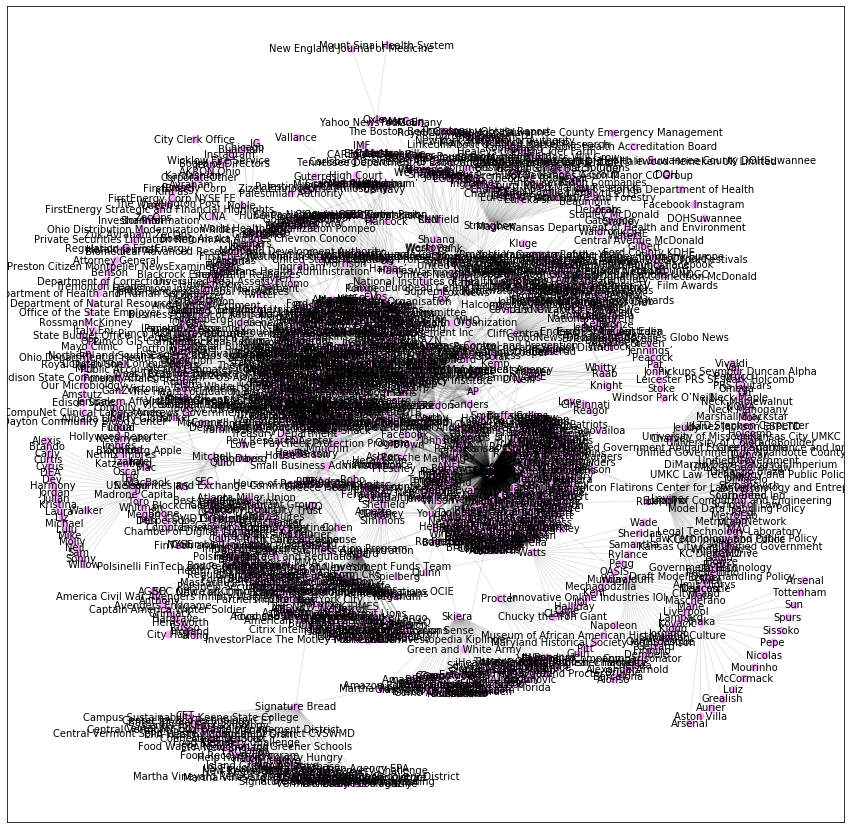

In [37]:
pos = nx.kamada_kawai_layout(G)
nodes = G.nodes()
fig, axs = plt.subplots(1, 1, figsize=(15,15))

el = nx.draw_networkx_edges(G, pos, alpha=0.1, ax=axs)
nl = nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color='#FAA6FF', 
                            with_labels=True, node_size=50, ax=axs)
ll = nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

### 5.1.6 Find shortest paths

We can now compute the shortest path between any two entities.

Let's take an example as below:

Entity 1: Chinese Communist Party

Entity 2: Trump

In [60]:
source='Chinese Communist Party'
target='Trump'

path = nx.shortest_path(G,
                 source=source,
                 target=target,
                 weight='inverse_weight')

path

['Chinese Communist Party', 'Caixin', 'Trump']

This gives us the chain of entities leading from Chinese Communist Party to Trump:

Chinese Communist Party --> Caixin --> Trump

### 5.1.7  Let’s take a look at which articles these were:

### Find relevant articles
Return the latest title of the article with both entities in it

In [61]:
shortest_path_dict = dict(nx.all_pairs_dijkstra_path_length(G, weight='inverse_weight'))

In [78]:
df_path = pd.DataFrame([(path[i-1], path[i]) for i in range(1, len(path))],
                       columns=['ent1', 'ent2'])

def get_common_title(ent1, ent2):
  df_art_path = df_articles[(df_articles['content'].str.contains(ent1)) & (df_articles['content'].str.contains(ent2))]
  df_art_path.sort_values('url', ascending=False).head(1)

  return df_art_path.iloc[0]['title']

df_path['titles'] = df_path.apply(lambda x: get_common_title(x['ent1'], x['ent2']), axis=1)

In [79]:
df_path

ent1    ent2  \
0  Chinese Communist Party  Caixin   
1                   Caixin   Trump   

                                              titles  
0  Pompeo: China 'Destroyed' Early Coronavirus Sa...  
1  Pompeo: China 'Destroyed' Early Coronavirus Sa...

In [80]:
print(df_path.loc[0,'titles'])
print(df_path.loc[1,'titles'])

Pompeo: China 'Destroyed' Early Coronavirus Samples
Pompeo: China 'Destroyed' Early Coronavirus Samples


Chinese Communist Party and Trump appeared in one article together.

Caixin is a  Media Company (Beijing-based media). 

From above we can see that Chinese Communist Party is related to Caixin and Caixin is related to trump. That's how all the three entities are related to each other. 

So, it makes sense as the title of the article is related to coronavirus. Caixin media have mentioned Trump and Chinese Communist Party in the same article which is abput coronavirus pandemic situation.

### 5.1.8 Who Are the Most Influential Entities on the News?

### Find centralities - eigenvector centrality measure

We can find each node’s centrality measure to find out how influential they are on the network. In other words, we will assign a score to each person or organisation based on how many other influential people or organisations they have appeared together with. This can be achieved using the eigenvector centrality measure:

100%|██████████| 1428/1428 [00:00<?, ?it/s]


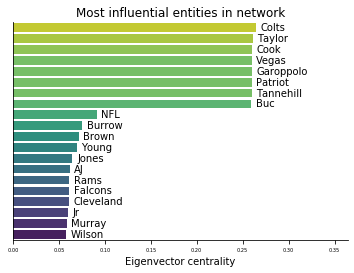

In [86]:
nodes = []
eigenvector_cents = []
ec_dict = nx.eigenvector_centrality(G, max_iter=1000, weight='weight')

for node in tqdm(G.nodes()):
  nodes.append(node)
  eigenvector_cents.append(ec_dict[node])

df_centralities = pd.DataFrame(data={'entity': nodes,
                                     'eigenvector': eigenvector_cents})

df_cent_top = df_centralities.sort_values('eigenvector', ascending=False).head(20)
df_cent_top.reset_index(inplace=True, drop=True)

g = sns.barplot(data=df_cent_top,
            x='eigenvector',
            y='entity',
            dodge=False,
            orient='h',
            hue='eigenvector',
            palette='viridis')
g.figsize=(10,8)
g.set_yticks([])
g.set_title('Most influential entities in network')
g.set_xlabel('Eigenvector centrality')
g.set_ylabel('')
g.set_xlim(0, max(df_cent_top['eigenvector'])+0.1)
g.legend_.remove()
g.tick_params(labelsize=5)

for i in df_cent_top.index:
    g.text(df_cent_top.iloc[i]['eigenvector']+0.005, i+0.25, df_cent_top.iloc[i]['entity'])

sns.despine()
g.get_figure().savefig('cent_plot.png', dpi=1000)

# 6. Conclusion:

### We have the below conclusion for our business problems which has been defined.

The longer (and greener) the bar for an entity, the more influential they have been on the news.

The Colts and Taylor lead the pack in terms of influence on news.

# 7. Modelling:

### 7.1 Load The Required Packages

In [96]:
import nltk
from nltk import pos_tag
from nltk.stem import PorterStemmer
from nltk import word_tokenize
from collections import Counter
import time
import pandas as pd
import re
from tqdm import tqdm
import numpy as np
from nltk.corpus import stopwords
#nltk.download('averaged_perceptron_tagger')
#nltk.download('stopwords')
#nltk.download('words')

### K-means:

#### K-means to text data

In particular, we are going to implement the Kmeans algorithm and apply it to the News data set from various source urls and show how this can be a useful way of summarizing large amounts of text and uncovering useful insights that might otherwise not be feasible.

we would be using unsupervised clustering methods and let the data sort itself based on the point’s location relative to the "centroids"meaning there are no target labels, that allows us to identify similar groups or clusters of data points within your data.

#### Concept of clustering

clusters are nothing more than groups that contain similar objects. Clustering is the process used for separating the objects into these groups. Objects inside of a cluster should be as similar as possible. Objects in different clusters should be as dissimilar as possible.

#### Why it might be useful?

one of the reasons it might be uselful is Genre Segmentation. A news company using this algorithm would be able to partition their articles into different genre groups depending on their characteristics. This can be a very useful way to determine the targeted genre of news like if it is an Opinion journalism, Science journalism or Celebrity journalism and offer things like recommending news which is likely to drive people towards their interests.

### 7.2 Load The Data

In [102]:
df_articles =  pd.read_csv('./data/800Articles.csv')
df_articles=df_articles.drop(['Unnamed: 0.1'],axis=1)
df_articles=df_articles.drop(['Unnamed: 0'],axis=1)
df_articles = df_articles[df_articles['content'].notna()]
df_articles.head()

url  \
0  https://www.espn.com/blog/atlanta-falcons/post...   
1  https://www.houstoniamag.com/coronavirus/2020/...   
2  https://www.theedgemarkets.com/article/mahb-do...   
3  https://www.wifr.com/content/news/Illinois-gar...   
4  https://newsinfo.inquirer.net/1263337/lacson-o...   

                                               title  \
0  Trade or not, Falcons can't afford first-round...   
1  A Local E.R. Doctor and Former Astronaut Talks...   
2  MAHB donates comfort kits to front liners at H...   
3           Illinois garden centers to reopen in May   
4  Lacson on P10M ‘reward’ for COVID-19 vaccine: ...   

                                    meta_description                  domain  \
0  Moving into the top 5 would be difficult for t...            www.espn.com   
1  Dr. William Fisher, a former astronaut and fat...    www.houstoniamag.com   
2  KUALA LUMPUR (April 23): Malaysia Airports Bhd...  www.theedgemarkets.com   
3  Garden centers across the state get the green ...            www.wifr.com   
4  Why not invest more in the country’s research ...   newsinfo.inquirer.net   

                                             content  
0  Kevin Negandhi dives into the careers of the t...  
1  A few weeks ago, we spoke to an Italian doctor...  
2  KUALA LUMPUR (April 23): Malaysia Airports Bhd...  
3  Garden centers in the region celebrate as Gove...  
4  MANILA, Philippines — Why not invest more in t...

### 7.3  Stemming the corpus


Stemming the words drastically cuts down on the size of the corpus. Instead of “realize” and “realized” being considered different words and being assigned their own dimensions, they’re reduced to their shared stem, “realiz”. This reduces noise from the data set.

we have to remove proper nouns from the corpus beacuse

there are too many of them.

they don’t tell us much about the content and manner of writing.

Also, they’re another form of noise when attempting to boil down the essence of these categories.

we have used Python’s NLTK package, but it isn’t perfect, and some proper nouns remained in the corupus after attempting to scrub them out.

Additionally, we have decided to remove digits/numbers, But there’s a line in there that deals with a tendency for NLTK’s tokenizer to sometimes leave in periods at the end of words.

An additional attribute in dataframe named "stems" is created to collect all the stemmed words from that particular article.

In [103]:
stemmer = PorterStemmer()
tokenizer = nltk.data.load("tokenizers/punkt/english.pickle")
def stem(x):
    dirty = word_tokenize(x)
    tokens = []
    for word in dirty:
        if word.strip(".") == "":
            pass
        elif re.search(r"\d{1,}", word):
            pass
        else:
            tokens.append(word.strip(".")) 

    tokens = pos_tag(tokens)
    stems = " ".join(stemmer.stem(key.lower()) for key, value in  tokens if value != "NNP") #getting rid of proper nouns
    return stems

In [104]:
df_articles['stems'] = df_articles.content.apply(lambda x: stem(x))

In [105]:
df_articles.head()

url  \
0  https://www.espn.com/blog/atlanta-falcons/post...   
1  https://www.houstoniamag.com/coronavirus/2020/...   
2  https://www.theedgemarkets.com/article/mahb-do...   
3  https://www.wifr.com/content/news/Illinois-gar...   
4  https://newsinfo.inquirer.net/1263337/lacson-o...   

                                               title  \
0  Trade or not, Falcons can't afford first-round...   
1  A Local E.R. Doctor and Former Astronaut Talks...   
2  MAHB donates comfort kits to front liners at H...   
3           Illinois garden centers to reopen in May   
4  Lacson on P10M ‘reward’ for COVID-19 vaccine: ...   

                                    meta_description                  domain  \
0  Moving into the top 5 would be difficult for t...            www.espn.com   
1  Dr. William Fisher, a former astronaut and fat...    www.houstoniamag.com   
2  KUALA LUMPUR (April 23): Malaysia Airports Bhd...  www.theedgemarkets.com   
3  Garden centers across the state get the green ...            www.wifr.com   
4  Why not invest more in the country’s research ...   newsinfo.inquirer.net   

                                             content  \
0  Kevin Negandhi dives into the careers of the t...   
1  A few weeks ago, we spoke to an Italian doctor...   
2  KUALA LUMPUR (April 23): Malaysia Airports Bhd...   
3  Garden centers in the region celebrate as Gove...   
4  MANILA, Philippines — Why not invest more in t...   

                                               stems  
0  dive into the career of the top four defens pr...  
1  a few week ago , we spoke to an italian doctor...  
2  ( ) : malaysia airport ( ) ha donat comfort ki...  
3  center in the region celebr as announc modif t...  
4  , whi not invest more in the countri s researc...

### 7.4 Removing Stopwords

Removing stopwords (a list of words for the algorithm to ignore) doesn’t matter as much as we will be type of vectorizer in which infrequent words are given low values. But it’s useful nonetheless, since at the very least it lowers memory usage and reduces the already very high dimensionality of our space.

In [108]:
stop = stopwords.words('english')
df_articles['stem_without_stopwords'] = df_articles['stems'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [109]:
df_articles['stem_without_stopwords'].head()

0    dive career top four defens prospect draft , i...
1    week ago , spoke italian doctor wa like europe...
2    ( ) : malaysia airport ( ) ha donat comfort ki...
3    center region celebr announc modif ' stay-at-h...
4    , whi invest countri research develop ? pose t...
Name: stem_without_stopwords, dtype: object

### 7.5 Creating a vocabulary


Now for a head count, tallying every single one of these stems throughout the corpus, which can then be taken and turned into a dataframe to be used for the document-term matrix and vocabulary.

The corpus is now a dataframe with each term in the vocabulary as item in the index, which will be useful in the near future.

In [110]:
from collections import Counter
all_words = Counter()
progress = 0
def count_everything(x):
    global all_words
    x = x.split(" ")
    for word in x:
        all_words[word] += 1

In [111]:
for item in tqdm(df_articles.stem_without_stopwords):
    count_everything(item)

100%|██████████| 748/748 [00:00<00:00, 5255.69it/s]


In [112]:
allwordsdf = pd.DataFrame(columns = ["words", "count"])
allwordsdf["count"] = pd.Series(list(all_words.values()))
allwordsdf["words"] = pd.Series(list(all_words.keys()))
allwordsdf.index = allwordsdf["words"]

In [113]:
allwordsdf.head()

words  count
words                
dive      dive      3
career  career     32
top        top    124
four      four    140
defens  defens     71

### 7.6 Keeping words in NLTK’s complete English corpus

One challenge when dealing with internet-derived text data is that non-words, like combinations of characters and symbols (e.g., “@username”, “#hashtags”, words that are conjoined with ellipses like “welll…”), appear with relative frequency. Rather than find and clean each one, I decided to keep only the words that are in the NLTK’s complete English corpus.

In [116]:
from nltk.corpus import words
nltkstems = [stemmer.stem(word) for word in words.words()] #stem the #words in the NLTK corpus so that they’re equivalent to the words in #the allwordsdf dataframe
nltkwords = pd.DataFrame() #make a new dataframe with the stemmed #NLTK words
nltkwords["words"] = nltkstems
allwordsdf = allwordsdf[allwordsdf["words"].isin(nltkwords["words"])] #keep only #those in the stemmed NLTK corpus


In [117]:
allwordsdf

words  count
words                            
dive                  dive      3
career              career     32
top                    top    124
four                  four    140
defens              defens     71
...                    ...    ...
misrepresent  misrepresent      1
northeastern  northeastern      1
vaunt                vaunt      1
backcourt        backcourt      1
nuptial            nuptial      1

[7852 rows x 2 columns]

### 7.7 Vectorizing the words:


A TfIdf (term frequency-inverse document frequency) vectorizer gives a value for each word in each article weighted by that words frequency in the whole corpus.

The inverse-document frequency is a denominator derived from the word’s frequency in the entire dataset.

Example:

Take the word "perspicacious", a word that, because of its many superior substitutes in English, is a word that we scarcely see. Because of that scarcity, its inverse-document frequency, or demoninator, is low. If it occurred 15 times in a single article, its Tf value, or numerator, would be high. So its TfIdf value would be a large numerator over a small demoninator, yielding a high number. So in our many-thousand-dimensional space, the article would have a value on the “perspicacious” dimension.

Additionally, creating a floor of words ensure that incredibly uncommon words that happen to appear all in one article aren’t flukes that cluster on their own. I chose words above the 40th quantile.

In [118]:
from sklearn.feature_extraction.text import TfidfVectorizer
stopwords = list(allwordsdf[(allwordsdf["count"] >= allwordsdf["count"].quantile(.995)) | (allwordsdf["count"] <= allwordsdf["count"].quantile(.4))]["words"])
vecvocab = list(allwordsdf[(allwordsdf["count"] < allwordsdf["count"].quantile(.995)) & (allwordsdf["count"] > allwordsdf["count"].quantile(.4))]["words"])
vec = TfidfVectorizer(stop_words = stopwords, vocabulary = vecvocab, tokenizer=None)

In [119]:
vec_matrix = vec.fit_transform(df_articles['stem_without_stopwords'])

In [120]:
vec_matrix.shape

(748, 4321)

### 7.8 Text Clustering

Taking n_clusters value as 10 would create 10 clusters.

In [121]:
from sklearn.cluster import KMeans
true_k = 10
clf10 = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
y_kmeans=clf10.fit(vec_matrix)

### 7.9 Assigning labels:

Now to assign the labels we’ve just created to the original dataframe for grouping, visualizing and analyzing:

In [122]:
df_articles['labels']= clf10.labels_

In [123]:
df_articles.head()

url  \
0  https://www.espn.com/blog/atlanta-falcons/post...   
1  https://www.houstoniamag.com/coronavirus/2020/...   
2  https://www.theedgemarkets.com/article/mahb-do...   
3  https://www.wifr.com/content/news/Illinois-gar...   
4  https://newsinfo.inquirer.net/1263337/lacson-o...   

                                               title  \
0  Trade or not, Falcons can't afford first-round...   
1  A Local E.R. Doctor and Former Astronaut Talks...   
2  MAHB donates comfort kits to front liners at H...   
3           Illinois garden centers to reopen in May   
4  Lacson on P10M ‘reward’ for COVID-19 vaccine: ...   

                                    meta_description                  domain  \
0  Moving into the top 5 would be difficult for t...            www.espn.com   
1  Dr. William Fisher, a former astronaut and fat...    www.houstoniamag.com   
2  KUALA LUMPUR (April 23): Malaysia Airports Bhd...  www.theedgemarkets.com   
3  Garden centers across the state get the green ...            www.wifr.com   
4  Why not invest more in the country’s research ...   newsinfo.inquirer.net   

                                             content  \
0  Kevin Negandhi dives into the careers of the t...   
1  A few weeks ago, we spoke to an Italian doctor...   
2  KUALA LUMPUR (April 23): Malaysia Airports Bhd...   
3  Garden centers in the region celebrate as Gove...   
4  MANILA, Philippines — Why not invest more in t...   

                                               stems  \
0  dive into the career of the top four defens pr...   
1  a few week ago , we spoke to an italian doctor...   
2  ( ) : malaysia airport ( ) ha donat comfort ki...   
3  center in the region celebr as announc modif t...   
4  , whi not invest more in the countri s researc...   

                              stem_without_stopwords  labels  
0  dive career top four defens prospect draft , i...       5  
1  week ago , spoke italian doctor wa like europe...       3  
2  ( ) : malaysia airport ( ) ha donat comfort ki...       1  
3  center region celebr announc modif ' stay-at-h...       5  
4  , whi invest countri research develop ? pose t...       3

## 8. Analyzing The Clusters

In [127]:
true_k=10
print("Top terms per cluster:")
order_centroids = clf10.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),


Top terms per cluster:
Cluster 0:
 polic
 arrest
 man
 suspect
 charg
 incid
 two
 allegedli
 offic
 car
Cluster 1:
 food
 support
 commun
 us
 free
 famili
 donat
 ad
 indian
 block
Cluster 2:
 page
 look
 search
 may
 link
 whatev
 move
 bad
 address
 found
Cluster 3:
 patient
 viru
 studi
 vaccin
 drug
 diseas
 death
 infect
 research
 hospit
Cluster 4:
 product
 industri
 custom
 data
 provid
 manufactur
 global
 research
 sale
 region
Cluster 5:
 know
 back
 us
 play
 even
 show
 two
 open
 thing
 last
Cluster 6:
 death
 patient
 nurs
 care
 facil
 confirm
 resid
 posit
 viru
 number
Cluster 7:
 worker
 unemploy
 claim
 employe
 program
 employ
 benefit
 file
 fund
 job
Cluster 8:
 billion
 quarter
 stock
 invest
 per
 fund
 investor
 price
 revenu
 notif
Cluster 9:
 ship
 crew
 member
 posit
 iranian
 flight
 contract
 viru
 vessel
 fire


##### Cluster 0: 
polic
 arrest
 man
 suspect
 charg
 incid
 two
 allegedli
 offic
 car

This cluster seems to be mainly related to Criminal Offence . So, this could be categorized under Criminal and Offence journalism.

 

##### Cluster 1: 
food
 support
 commun
 us
 free
 famili
 donat
 ad
 indian
 block

This seems to be more of Community love jornalism


##### Cluster 6:
billion,drug,per,unemploy,sale,revenu,last,quarter,custom,expect

These clusters are more related to unemployemnt and food crisis. So, this could be categorized under Country Economy journalism.

and

##### Cluster 3: 
patient,viru,death,care,infect,posit,hospit,confirm,number,nurs

This cluster is more related to ongoing Coronavirus pandemic. So, this could be categorized under Health journalism.

 

##### Cluster 2:
page,look,search,may,link,whatev,bad,address,move,found

and

##### Cluster 8:
browser,notif,polic,redirect,fire,allow,shortli,man,automat,block

 

These cluster are not explanatory enough for any journalism catergorization . But it seems to be somewhat associated with Internet activities.

 

##### Cluster 4:
stock,oil,price,investor,barrel,quarter,bank,share,dividend

This cluster is related to Stock market news.

 

##### Cluster 5:
us,know,commun,back,love,look,support,tri,see,flight

This seems to be more of Community love jornalism

 

##### Cluster 7:
product,industri,research,global,provid,region,growth,player,fiber,analysi

This is Global Industrialization journalism related to Global growth of industries in the country.

 

##### Cluster 8:
billion
 quarter
 stock
 invest
 per
 fund
 investor
 price
 revenu
 notif

This cluster seems to be built around Finance journalism.

##### Cluster 9:
ship
 crew
 member
 posit
 iranian
 flight
 contract
 viru
 vessel
 fire
 
This cluster seems to be built around Navy journalism.

## 9. Predicting random news article headline

we have taken random news article to see which cluster it would be assigned to

In [129]:
# print("Prediction")

vec_test = vec.fit_transform(['Stock futures chipping away at some of Thursday plunge'])
# vec_test_pca = pca.fit_transform(vec_matrix)
prediction = clf10.predict(vec_test)
print(prediction)

[5]


The article with headline "Stock futures chipping away at some of Thursday plunge" is assigned to cluster 4 which makes sense as cluster 5 contains words like (us,know,commun,back,love,look,support,tri,see,flight)

# 10. Future Scoping of the Project:

### Are There Groups of People Who Regularly Appear Together on the News?

In other words, can we identify cliques in our network.

                      "Cliques are a set of nodes in a graph in which every pair of nodes is connected."
                      
The algorithm we’ll use to do this is called k-clique communities , which allows us to find closely connected clusters in the network by defining k, or the minimum number of nodes required for a clique to be formed. There could be a case when one node can be very popular and belong to multiple cliques.

100%|██████████| 28/28 [00:01<00:00, 16.40it/s]


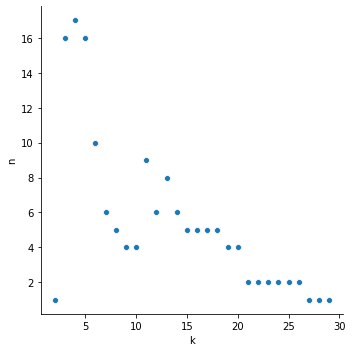

In [32]:
from networkx.algorithms.community.kclique import k_clique_communities
clique_sizes = range(2, 30)
n_cliques = []
0
for k in tqdm(clique_sizes):
  n_cliques.append(len(list(k_clique_communities(G, k))))

df_relplot = pd.DataFrame(data={'k': clique_sizes,
                                'n': n_cliques})

sns.relplot(data=df_relplot,
            x='k',
            y='n')

From the above graph we can imply that with changing the value of "k" (number of nodes in a clique) the "n" ( number of cliques) are changing.

If we select k=5 , then the number of cliques are coming to be 16 which is too high and it wouldn't give any clear picture.

Selecting higher value of k will result into 1 or 2 cliques or lower value of k will gove way too many cliques which would be hard for visualization.
So, Setting k = 12 would give us 6  manageable cliques.


In [44]:
cliques = list(k_clique_communities(G, 12))
cliques

[frozenset({'Buc',
            'Cleveland',
            'Colts',
            'Cook',
            'Eagles',
            'Garoppolo',
            'Patriot',
            'Philly',
            'Tannehill',
            'Taylor',
            'Vegas',
            'Wentz',
            'Williams'}),
 frozenset({'AJ',
            'Baltimore',
            'Baltimore Ravens',
            'Bear',
            'Bengals',
            'Brady',
            'Brown',
            'Buc',
            'Burrow',
            'Cardinal',
            'Chargers',
            'Cleveland',
            'Colts',
            'Cook',
            'Dallas',
            'Denver',
            'Diggs',
            'Dolphins',
            'Falcons',
            'Fitzpatrick',
            'Garoppolo',
            'Goff',
            'Howard',
            'Jacksonville',
            'Jets',
            'Johnson',
            'Jones',
            'Jr',
            'Lions',
            'Manning',
            'Miami',
            

### Find centralities in cliques

We’ll also calculate the eigenvector centrality in each subgraph formed by the cliques (this, again, will be based on edge weights) and visualise the results.

In [45]:
eigenvector_cents = []
entities = []
clique_ids = []

for id, clique in enumerate(cliques):
  sg = G.subgraph(list(clique))

  nodes = sg.nodes()

  clique_ids.extend(np.repeat(id, len(nodes)))
  entities.extend(nodes)

  ec_dict = nx.eigenvector_centrality(sg, max_iter=1000, weight='weight')

  for entity in nodes:
    eigenvector_cents.append(ec_dict[entity])

df_cliques = pd.DataFrame(data={
    'clique': clique_ids,
    'entity': entities,
    'centrality': eigenvector_cents
})

df_cliques

clique                                      entity  centrality
0         0                                      Philly    0.194891
1         0                                      Taylor    0.318215
2         0                                      Eagles    0.194891
3         0                                   Garoppolo    0.318215
4         0                                        Cook    0.318215
..      ...                                         ...         ...
136       5  Centers for Disease Control and Prevention    0.186403
137       5                                          AP    0.173618
138       5             Afghanistan Veterans of America    0.156312
139       5                      National Nurses United    0.156312
140       5                                Westmoreland    0.156312

[141 rows x 3 columns]

In [46]:
col_pal = {0: '#F1E3F3',
           1: '#A0DDFF',
           2: '#FF8A5B',
           3: '#74D3AE',
           4: '#93B7BE',
           5: '#D1B1CB',
           6: '#BAF2BB',
           7: '#FFA69E',
           8: '#97EAD2',
           9: '#34E4EA',
           10: '#B95F89',
           99:'#828A95'}

### Plot cliques

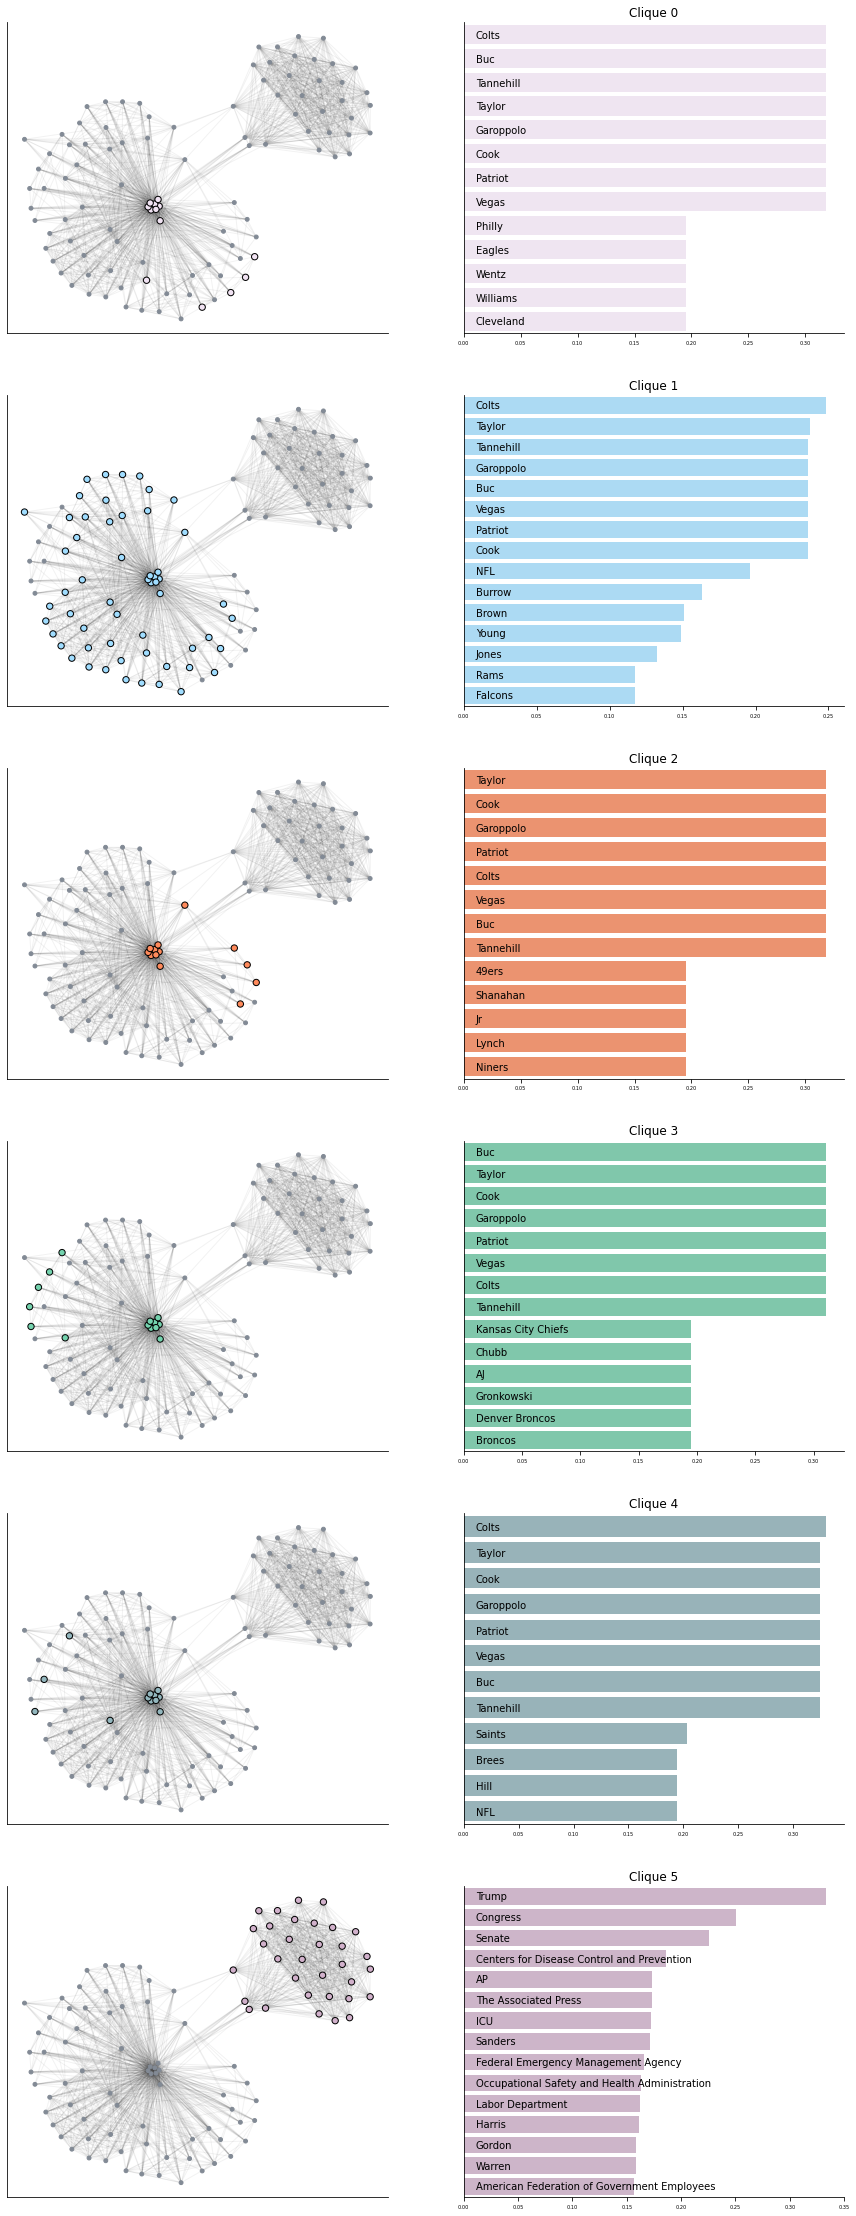

In [47]:
G_clique = G.subgraph(df_cliques['entity'].unique())
pos = nx.kamada_kawai_layout(G_clique)
nodes = G_clique.nodes()


fig, axs = plt.subplots(max(df_cliques['clique'])+1, 2, figsize=(15,40))

for clique in range(max(df_cliques['clique'])+1):
  node_colors = [col_pal[clique] if node in df_cliques[df_cliques['clique']==clique]['entity'].values else col_pal[99] for node in nodes]
  sizes = [40 if node in df_cliques[df_cliques['clique']==clique]['entity'].values else 15 for node in nodes]
  edge_colors = ['black' if node in df_cliques[df_cliques['clique']==clique]['entity'].values else col_pal[99] for node in nodes]

  ec = nx.draw_networkx_edges(G_clique, pos, alpha=0.05, ax=axs[clique, 0])
  nc = nx.draw_networkx_nodes(G_clique, pos, nodelist=nodes, node_color=node_colors, 
                              with_labels=False, node_size=sizes, ax=axs[clique, 0],
                              edgecolors=edge_colors)
  
  df_clique_ind = df_cliques[df_cliques['clique']==clique]
  df_clique_ind = df_clique_ind.sort_values('centrality', ascending=False).head(15)
  df_clique_ind.reset_index(inplace=True, drop=True)

  g = sns.barplot(data=df_clique_ind,
              x='centrality',
              y='entity',
              hue='clique',
              palette=col_pal,
              dodge=False,
              orient='h',
              ax=axs[clique, 1])
  
  g.set_yticks([])
  g.set_title(f'Clique {clique}')
  g.set_xlabel('')
  g.set_ylabel('')
  g.legend_.remove()
  g.tick_params(labelsize=5)

  for i in df_clique_ind.index:
    g.text(max(df_clique_ind['centrality'])/30, i+0.15, df_clique_ind.iloc[i]['entity'])
  

sns.despine()

fig.savefig('clique_plot.png', dpi=1000)

Each pair of graphs represents a clique. On the left plot, we see the position of the nodes on the network, and on the right, we see the most influential nodes in the clique.

This allows us to identify core topics on the news via the groups of people who appeared together a lot:

### Clique 0 ,1, 2, 3, 4: 

    Trent Nelson Taylor is an American football wide receiver for the San Francisco 49ers of the National Football League and Wide receiver Trent Taylor was a popular target for Jimmy Garoppolo.
    
So, in Clique 0 to 4 we can see the core topic on the news was National Football League. This implies that on day 2020-04-23 Trent taylor was more over the news regarding his foot injury and 49ers coaches' high expectations for Taylor before he sustained a foot injury in preseason that kept him out for the year(Super Bowl).

### Clique 5:
 
 From the nodes we can observe that the core topic on the news was  US political and commercial entities.

# Thank you!